# Nota

O objetivo deste notebook é ler um arquivo CSV e plotar a curva normal para que se faça a nálise das notas da turma.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from pathlib import Path
import PyPDF2
import regex
import scipy.stats as stats
import csv

In [2]:
pdf_folder = Path('report2')  # alter if PDFs are in a different folder
records = []

# Python (using third-party `regex` for full Unicode letter support)
patterns_name = [
    regex.compile(r"Aluno[:\s]*(?P<name>[^\r\n]+)", regex.IGNORECASE),
]
patterns_matricula = [
    regex.compile(r"Matrícula[:\s]*(?P<matricula>[^\r\n]+)", regex.IGNORECASE),
]
patterns_score = [
    regex.compile(r'Pontuação[:\s]*([0-9]+(?:[.,][0-9]+)?)', regex.IGNORECASE),
]

for pdf_path in sorted(pdf_folder.glob('*.pdf')):
    try:
        reader = PyPDF2.PdfReader(str(pdf_path))
        pages_text = []
        for pg in reader.pages:
            txt = pg.extract_text()
            if txt:
                pages_text.append(txt)
        full_text = "\n".join(pages_text)
    except Exception as e:
        records.append({"file": pdf_path.name, "name": None, "score": None, "error": str(e)})
        continue

    # find name
    name = None
    for p in patterns_name:
        m = p.search(full_text)
        if m:
            name = m.group(1).strip()
            break
    
    # find matricula
    matricula = None
    for p in patterns_matricula:
        m = p.search(full_text)
        if m:
            matricula = m.group(1).strip()
            break
    
    # find score
    score = None
    for p in patterns_score:
        m = p.search(full_text)
        if m:
            s = m.group(1).replace(',', '.')
            try:
                score = float(s)
            except:
                score = None
            break

    # fallback: first numeric between 0 and 100
    if score is None:
        m = re.search(r'([0-9]{1,3}(?:[.,][0-9]+)?)', full_text)
        if m:
            s = m.group(1).replace(',', '.')
            try:
                val = float(s)
                if 0 <= val <= 100:
                    score = val
            except:
                pass

    records.append({"file": pdf_path.name, "name": name, "matricula": matricula, "P1": score})

# build DataFrame with parsed results (uses existing pandas import)
pdf_df = pd.DataFrame(records)

pdf_df["P1"] = pdf_df["P1"] * (48/9)

print(f"Found {len(records)} PDF(s). Parsed name+score pairs: {len(pdf_df)}")
display(pdf_df)

Found 36 PDF(s). Parsed name+score pairs: 36


,file,name,matricula,P1
0,2025-10-20 - Ana Julia Martins Costa - T202520...,Ana Julia Martins Costa,T202520164,58.666667
1,2025-10-20 - Anna Julia Ventura da Conceicao -...,Anna Júlia Ventura da Conceição,T202520160,21.333333
2,2025-10-20 - Antony Faria Lourenco Santana Sil...,Antony Faria Lourenço Santana Silva,T202520166,69.333333
3,2025-10-20 - Arianne da Silva Oliveira - T2025...,Arianne da Silva Oliveira,T202520158,42.666667
4,2025-10-20 - Arthur de Araujo Alverez Carvalho...,Arthur de Araújo Alverez Carvalho,T202520156,53.333333
5,2025-10-20 - Barbara Celestina Oza - T20252017...,Bárbara Celestina Oza,T202520179,48.000000
6,2025-10-20 - Caio Mendonca Monsores - T2025201...,Caio Mendonça Monsores,T202520157,48.000000
7,2025-10-20 - Daniel de Souza Araujo - T2025201...,Daniel de Souza Araujo,T202520174,48.000000
8,2025-10-20 - Daniel Rocha Brito - T202520169.pdf,Daniel Rocha Brito,T202520169,58.666667
9,2025-10-20 - Edson Lima Brasil Junior - T20252...,Edson Lima Brasil Júnior,T202520098,53.333333


In [3]:
from pathlib import Path

# adjust filename if needed
csv_path = Path("l1_2.csv")
if not csv_path.exists():
    raise FileNotFoundError(f"CSV not found: {csv_path}. Update `csv_path` to the correct file.")

# read CSV (keep as strings) — use ';' separator
listas = pd.read_csv(csv_path, sep=';', dtype=str, encoding='utf-8', low_memory=False)

# detect columns (tolerant to small name variations)
code_col = next((c for c in listas.columns if re.search(r'Código', c, re.I) and re.search(r'matrícula', c, re.I)), None)
lista_col = next((c for c in listas.columns if re.search(r'Lista', c, re.I)), None)
if code_col is None or lista_col is None:
    raise KeyError(f"Couldn't detect required columns. Available: {listas.columns.tolist()}")

# normalize matrícula: remove the '1-1381-' prefix if present and trim
listas['matricula'] = listas[code_col].astype(str).str.strip().str.replace('1-1381-', '', regex=False).str.strip()

# extract numeric value from "Lista 01" into new column L1
listas['L1'] = pd.to_numeric(
    listas[lista_col].astype(str).str.replace(',', '.').str.extract(r'([0-9]+(?:\.[0-9]+)?)')[0],
    errors='coerce'
)

# merge with pdf_df on 'matricula' (keeps all pdf_df rows)
merged_df = pdf_df.merge(listas[['matricula', 'L1']], on='matricula', how='left')

# ensure L1 is numeric and replace missing values with 0.0
merged_df['L1'] = pd.to_numeric(merged_df.get('L1'), errors='coerce').fillna(0.0)

merged_df['A1'] = merged_df['P1'] + merged_df['L1']

# show result
display(merged_df)

,file,name,matricula,P1,L1,A1
0,2025-10-20 - Ana Julia Martins Costa - T202520...,Ana Julia Martins Costa,T202520164,58.666667,0.00,58.666667
1,2025-10-20 - Anna Julia Ventura da Conceicao -...,Anna Júlia Ventura da Conceição,T202520160,21.333333,18.66,39.993333
2,2025-10-20 - Antony Faria Lourenco Santana Sil...,Antony Faria Lourenço Santana Silva,T202520166,69.333333,18.67,88.003333
3,2025-10-20 - Arianne da Silva Oliveira - T2025...,Arianne da Silva Oliveira,T202520158,42.666667,18.66,61.326667
4,2025-10-20 - Arthur de Araujo Alverez Carvalho...,Arthur de Araújo Alverez Carvalho,T202520156,53.333333,0.00,53.333333
5,2025-10-20 - Barbara Celestina Oza - T20252017...,Bárbara Celestina Oza,T202520179,48.000000,16.00,64.000000
6,2025-10-20 - Caio Mendonca Monsores - T2025201...,Caio Mendonça Monsores,T202520157,48.000000,0.00,48.000000
7,2025-10-20 - Daniel de Souza Araujo - T2025201...,Daniel de Souza Araujo,T202520174,48.000000,20.00,68.000000
8,2025-10-20 - Daniel Rocha Brito - T202520169.pdf,Daniel Rocha Brito,T202520169,58.666667,20.00,78.666667
9,2025-10-20 - Edson Lima Brasil Junior - T20252...,Edson Lima Brasil Júnior,T202520098,53.333333,18.67,72.003333


In [6]:
# --- Passo 1: Criar um arquivo CSV com o que foi lido no pdf ---
with open('p1_2.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['Matrícula','Nome', 'P1', 'L1', 'A1'])
    # Adicionando notas de exemplo com uma certa distribuição
    for file,name,matricula,p1,l1,a1 in merged_df.itertuples(index=False):
        writer.writerow([matricula, name, p1, l1, a1])
print("Arquivo 'p1_2.csv' de exemplo criado com sucesso.")


Arquivo 'p1_2.csv' de exemplo criado com sucesso.



Análise das Notas:
Média (μ): 64.22
Desvio Padrão (σ): 17.19


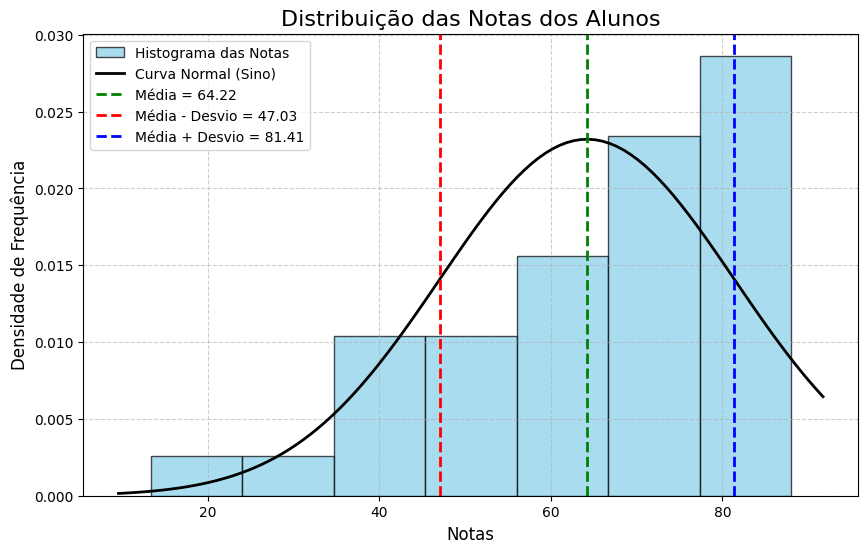

In [7]:
# --- Passo 2: Ler o arquivo CSV e extrair os dados ---
try:
    # Use o pandas para ler o arquivo CSV
    df = pd.read_csv('p1_2.csv')

    # Extrai a coluna de notas para uma variável.
    # IMPORTANTE: Mude 'Nota' se o nome da sua coluna for diferente.
    notas = df['A1']

    # --- Passo 3: Calcular a Média e o Desvio Padrão ---
    media = notas.mean()
    desvio_padrao = notas.std()

    print(f"\nAnálise das Notas:")
    print(f"Média (μ): {media:.2f}")
    print(f"Desvio Padrão (σ): {desvio_padrao:.2f}")


    # --- Passo 4: Criar o Gráfico (Histograma e Curva de Sino) ---

    # Cria a figura e os eixos para o gráfico
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plota o Histograma
    # O parâmetro 'density=True' normaliza o histograma, permitindo que a
    # área total das barras seja 1. Isso é essencial para sobrepor a curva de densidade.
    ax.hist(notas, bins='auto', density=True, alpha=0.7, color='skyblue', edgecolor='black', label='Histograma das Notas')

    # Cria a Curva de Sino (Distribuição Normal)
    # Gera uma sequência de pontos no eixo X para desenhar a curva
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    
    # Calcula a probabilidade de cada ponto usando a função de densidade de probabilidade (pdf)
    p = stats.norm.pdf(x, media, desvio_padrao)

    # Plota a curva
    ax.plot(x, p, 'k', linewidth=2, label='Curva Normal (Sino)')

    # --- Passo 5: Customizar e Exibir o Gráfico ---

    # Adiciona uma linha vertical para marcar a média
    ax.axvline(media, color='green', linestyle='dashed', linewidth=2, label=f'Média = {media:.2f}')
    ax.axvline(media - desvio_padrao, color='red', linestyle='dashed', linewidth=2, label=f'Média - Desvio = {media - desvio_padrao:.2f}')
    ax.axvline(media + desvio_padrao, color='blue', linestyle='dashed', linewidth=2, label=f'Média + Desvio = {media + desvio_padrao:.2f}')

    # Adiciona títulos e rótulos
    title = "Distribuição das Notas dos Alunos"
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Notas', fontsize=12)
    ax.set_ylabel('Densidade de Frequência', fontsize=12)
    
    # Adiciona a legenda para identificar os elementos do gráfico
    ax.legend()
    
    # Adiciona um grid para melhor visualização
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Exibe o gráfico
    plt.show()

except FileNotFoundError:
    print("\nErro: O arquivo 'p1.csv' não foi encontrado.")
    print("Por favor, certifique-se de que o arquivo está na mesma pasta que o script ou forneça o caminho completo.")
except KeyError:
    print("\nErro: A coluna 'Nota' não foi encontrada no arquivo CSV.")
    print("Por favor, verifique se o nome da coluna no seu arquivo CSV está correto.")